In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import jellyfish
%matplotlib inline
import scipy.stats
import sklearn.preprocessing
import webbrowser
from pytagcloud import create_tag_image, make_tags
from pytagcloud.lang.counter import get_tag_counts
import networkx as nx
from numba import jit
import time

In [2]:
data=pd.read_csv('C:/Users/jpisel/Downloads/output/NationalNames.csv')
dataf=pd.DataFrame(data)

In [24]:
o0=time.time()
year=1880
gender="M"
similars=95
sel=dataf[(dataf["Year"]==year) & (dataf["Gender"]==gender)]
times=np.zeros(1000)
compare=np.zeros(shape=(np.shape(sel)[0],np.shape(sel)[0]))
for z in range(1,1000):
    o0=time.time()
    for i in range(0,z):
        for j in range(i,np.shape(sel)[0]):
            comp=jellyfish.damerau_levenshtein_distance(unicode(sel["Name"].iloc[i]),unicode(sel["Name"].iloc[j]))
            compare[i,j]+=comp
    W = np.maximum( compare, compare.transpose() )
    A=scipy.stats.threshold(W, threshmin=np.percentile(np.ndarray.flatten(W),similars))
    G=nx.from_numpy_matrix(A)
    connections=nx.degree_centrality(G)
    pos=nx.spring_layout(G, k=0.5, iterations=20,scale=50)
    nx.draw(G,pos, node_color=np.array(connections.values()),node_size=10,cmap=plt.cm.gnuplot, linewidths=.01, width=.00001)
    plt.clf()
    o1=time.time()
    times[z]+=o1-o0
print times

[  0.           4.39199996   4.52900004   4.62400007   4.83799982
   4.97500014   5.18899989   5.33800006   5.5480001    5.6869998
   5.91400003   6.06299996   6.33800006   6.43099999   6.53699994
   6.72200012   6.90799999   7.10000014   7.23000002   7.47099996
   7.56699991   7.79400015   7.92299986   8.14300013   8.28299999
   8.58899999   8.60599995   8.81800008   8.92799997   9.05299997
   9.22199988   9.31999993   9.3829999    9.52600002   9.66600013
   9.75399995   9.94300008   9.954       10.12199998  10.20700002
  10.24099994  10.35599995  10.4519999   10.55800009  10.62899995
  10.68400002  10.875       10.92900014  11.04900002  11.21399999
  11.3579998   11.42500019  11.59599996  11.69000006  11.77899981
  11.85400009  11.92400002  12.16700006  12.10399985  12.21399999
  12.2980001   12.44400001  12.61400008  12.66100001  12.7809999
  12.90799999  13.05599999  13.10599995  13.16700006  13.27999997
  13.44700003  13.50999999  13.66400003  13.79399991  13.89700007
  13.9670000

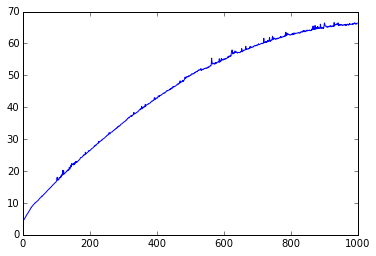

In [25]:
plt.plot(times)
plt.show()

In [58]:
from scipy.optimize import curve_fit
def func(x, a, b, c):
    return (a*x)/(c+x)

xdata = np.arange(0, 1000)
y = func(xdata, 2.5, 1.3, 0.5)
ydata = times

popt, pcov = curve_fit(func, xdata, ydata)

In [59]:
print popt

[ 109.09614077    1.          600.95297853]


In [50]:
np.ndarray.flatten(popt)

array([ 7.58971658,  0.35565167, -3.72852745])

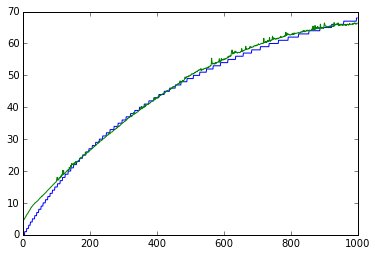

In [64]:
fit=func(xdata,109,1,601)
plt.plot(fit)
plt.plot(times)
plt.xlim([0,1000])
plt.ylim([0,70])
plt.show()